# [Curso de Clusterização de dados: segmentação de clientes](https://cursos.alura.com.br/course/clusterizacao-dados-segmentacao-clientes)

- [Dados](https://github.com/smalvar/Client-Segmentation/blob/master/BancoDeDados.zip)

In [ ]:
!wget https://github.com/smalvar/Client-Segmentation/blob/master/BancoDeDados.zip

--2023-07-02 03:34:21--  https://github.com/smalvar/Client-Segmentation/blob/master/BancoDeDados.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘BancoDeDados.zip’

BancoDeDados.zip        [ <=>                ] 138.95K  --.-KB/s    in 0.02s   

2023-07-02 03:34:21 (6.25 MB/s) - ‘BancoDeDados.zip’ saved [142282]



In [ ]:
!unzip BancoDeDados.zip

In [11]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("BancoDeDados.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [14]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [157]:
def plot_perc(x_var_name, dados, figsize=(20, 8)):
  plt.figure(figsize=figsize)
  graph = sns.countplot(x=x_var_name, data=dados, orient='h')
  graph.set_ylabel("Contagem", fontsize=17)

  sizes = []
  for patch in graph.patches:
    height = patch.get_height()
    sizes.append(height)
    graph.text(patch.get_x() + patch.get_width()/1.6,
               height+200,
               "{:1.2f}%".format(height/116581*100),
               ha='center',
               va='bottom',
               fontsize=12)
  graph.set_ylim(0, max(sizes)*1.1)

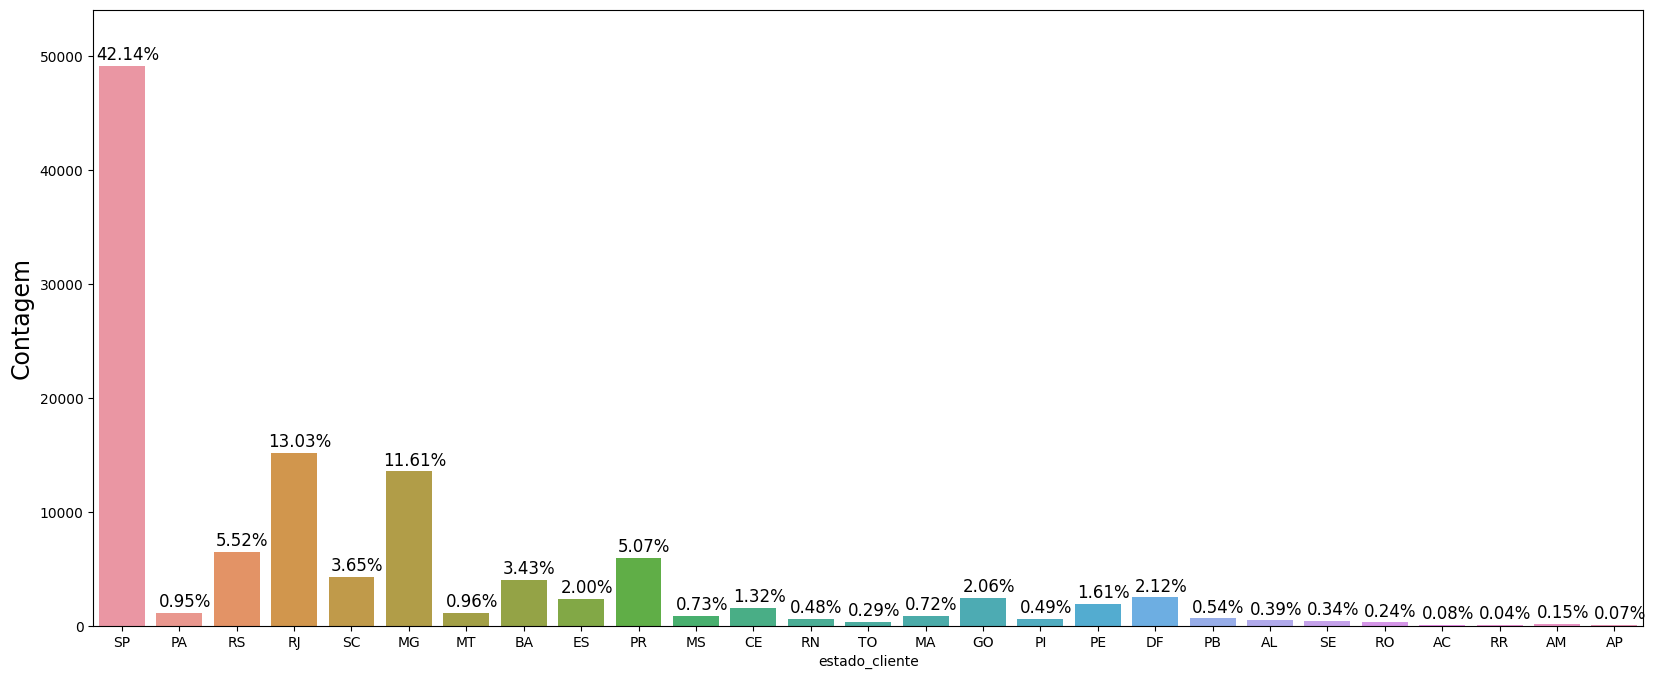

In [16]:
plot_perc('estado_cliente', df)

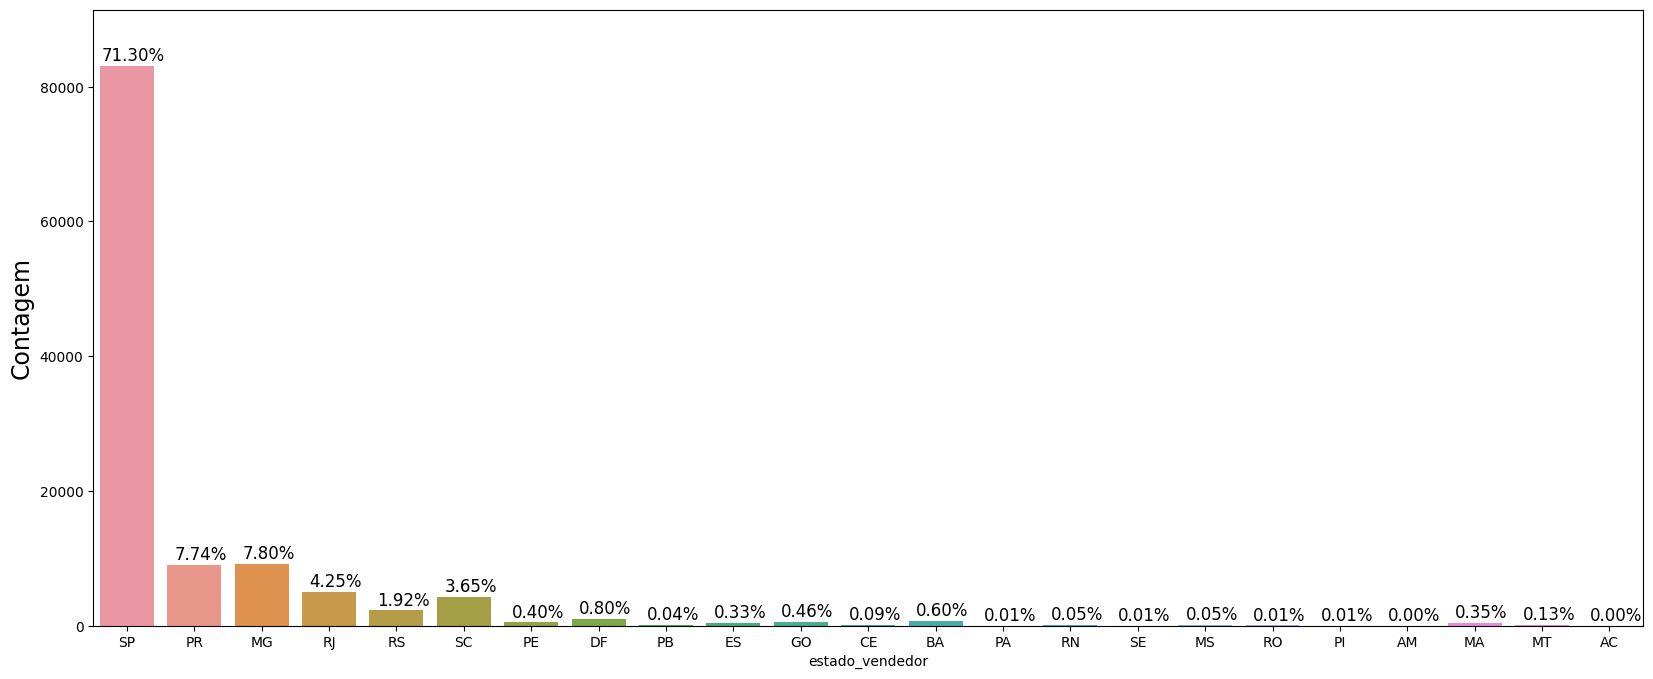

In [17]:
plot_perc("estado_vendedor", df)

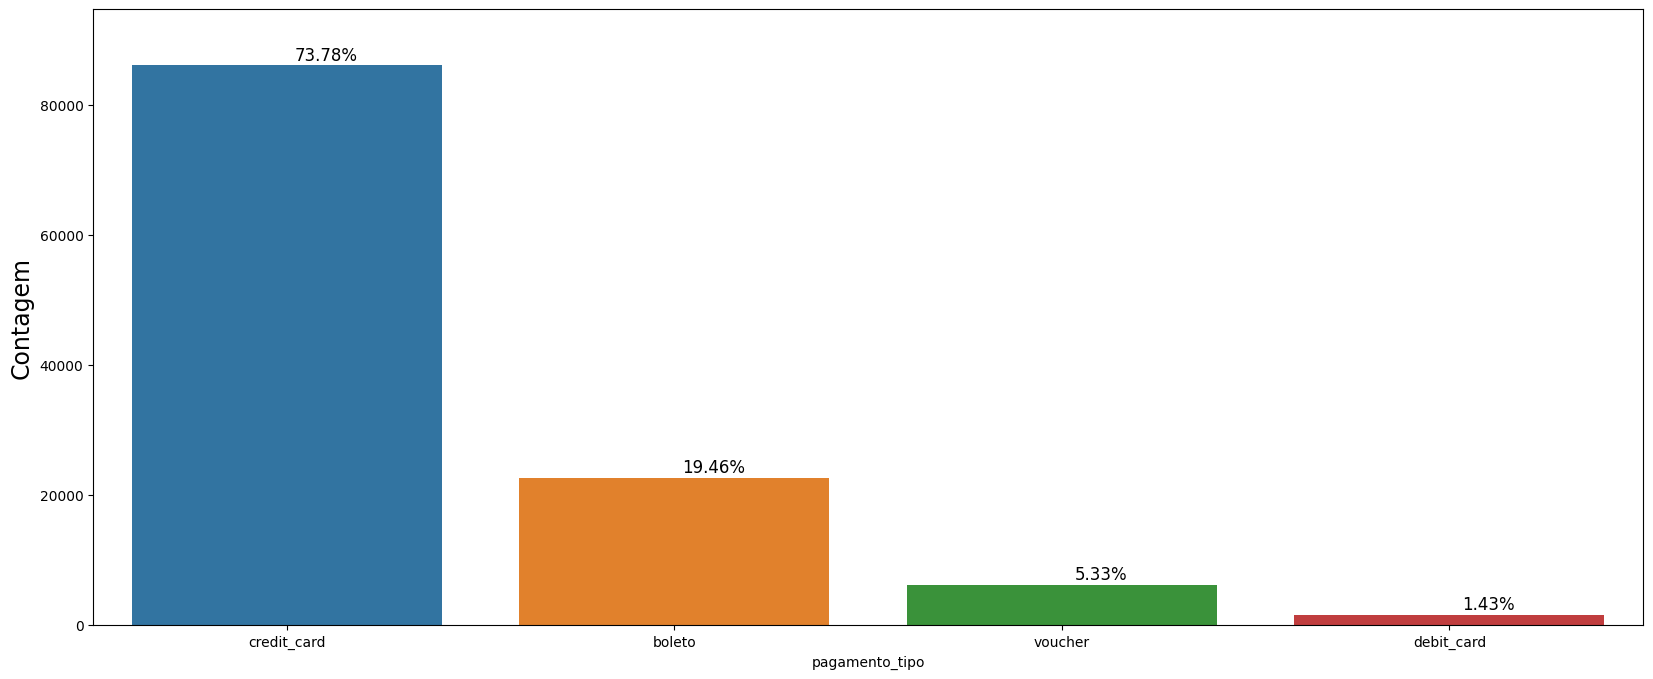

In [18]:
plot_perc("pagamento_tipo", df)

# RFM

## Recência (R)

Há quantos dias foi a ultima compra desse cliente?

## Frequência (F)

Quantas compras esse cliente já fez na sua empresa, desde que cadastrou?

## Monetaridade/Receita (M)

Quanto esse cliente já gastou em dinheiro na sua empresa?

In [19]:
df_olist = df[["id_unico_cliente", "id_cliente", "horario_pedido", "item_id", "preco"]]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [20]:
df_compra = df.groupby("id_unico_cliente").horario_pedido.max().reset_index()
df_compra.columns = ["id_unico_cliente", "data_max_compra"]
df_compra["data_max_compra"] = pd.to_datetime(df_compra["data_max_compra"])
df_compra.head()

,id_unico_cliente,data_max_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [21]:
df_compra["recencia"] = (df_compra["data_max_compra"].max() - df_compra["data_max_compra"]).dt.days

In [22]:
df_usuario = pd.merge(df_olist, df_compra[["id_unico_cliente", "recencia"]], on="id_unico_cliente")
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [23]:
from sklearn.cluster import KMeans

def calcular_wcss(df, clusters_test=10):
  wcss = []
  df_copy = df.copy()
  for n in range(1, clusters_test+1):
    kmeans = KMeans(n_clusters=n, n_init=10)
    kmeans.fit(X=df_copy)
    df[f"clusters_{n}"] = kmeans.labels_
    wcss.append(kmeans.inertia_)
  return wcss

In [24]:
df_recencia = df_usuario[["recencia"]].copy()
df_recencia.head()

,recencia
0,474
1,298
2,298
3,483
4,211


In [25]:
soma_quadrados = calcular_wcss(df_recencia)
soma_quadrados

[2733029504.943269,
 807902990.2831912,
 362065594.354722,
 213811056.7187604,
 135786846.4084472,
 96240157.39698035,
 69762302.65166253,
 55535503.33299457,
 44013569.76144618,
 35953086.85222306]

In [26]:
df_recencia.head()

,recencia,clusters_1,clusters_2,clusters_3,clusters_4,clusters_5,clusters_6,clusters_7,clusters_8,clusters_9,clusters_10
0,474,0,0,2,2,1,3,0,1,6,6
1,298,0,0,1,0,0,5,2,2,2,4
2,298,0,0,1,0,0,5,2,2,2,4
3,483,0,0,2,2,1,3,0,1,6,6
4,211,0,1,1,3,4,2,6,5,8,8


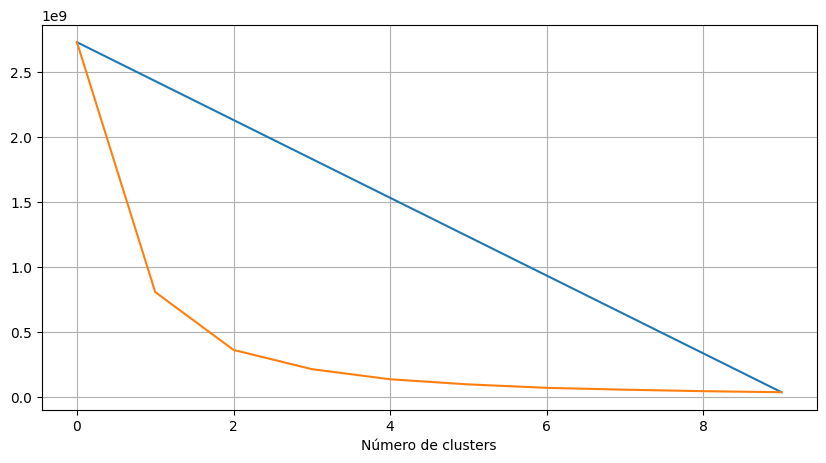

In [27]:
plt.figure(figsize=(10, 5))
p0 = (0, soma_quadrados[0])
p1 = (len(soma_quadrados)-1, soma_quadrados[-1])
plt.plot([p0[0], p1[0]], [p0[1], p1[1]])
plt.plot(soma_quadrados)
plt.grid()
plt.xlabel("Número de clusters")
plt.show()

## A inérica é tão boa assim?

* A inércia funciona bem em clusters redondos, mas é uma métrica ruim se seus clusters são de formato irregular
* Não é uma métrica normalizada, então se você tiver muitas dimensões (ou variáveis) vai ter problemas, já que as distâncias ficam infladas.

Método para determinar o número ideal de clusters:

$distance(P_0, P_1, (x, y)) = \frac{|x(y_1 - y_0) - y(x_1 - x_0) + y_0x_1 - x_0y_1|}{\sqrt{(y_1 - y_0)^2 + (x_1 - x_0)^2}}$

- O ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e menor diferença entre clusters é o ponto mais distante da reta traçada entre o inicial e o final!

In [28]:
import math

def numero_otimo_clusters(wcss):
  starting_cluster=2
  x0, y0 = (starting_cluster, wcss[0])
  x1, y1 = (len(wcss)-1, wcss[-1])

  # pula clusters de acordo com starting_cluster
  # pois não faz sentido ter 0 e 1 clusters.
  distancias = [0]*starting_cluster
  next_cluster = starting_cluster+1
  for i in range(0, len(wcss)):
    x = i+next_cluster
    y = wcss[i]
    numerador = abs(x*(y1 - y0) - y*(x1 - x0) + y0*x1 - x0*y1)
    denominador = math.sqrt((y1-y0)**2 + (x1-x0)**2)
    distancias.append(numerador/denominador)
  return distancias.index(max(distancias))

In [29]:
n_ideal_clusters = numero_otimo_clusters(soma_quadrados)
n_ideal_clusters

4

In [30]:
kmeans = KMeans(n_clusters=n_ideal_clusters)
df_usuario['recencia_clusters'] = kmeans.fit_predict(df_recencia[[f"clusters_{n_ideal_clusters}"]])
df_usuario.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,1


In [31]:
agrupado_por_cluster = df_usuario.groupby("recencia_clusters")["recencia"].mean().reset_index()
agrupado_por_cluster

,recencia_clusters,recencia
0,0,66.405850
1,1,187.076277
2,2,318.687376
3,3,489.070832


A pontuação deverá ser feita de forma decrescente, pois quanto maior o número da recência, quer dizer que mais tempo que ele não compra.

In [32]:
agrupado_por_cluster.sort_values("recencia")

,recencia_clusters,recencia
0,0,66.405850
1,1,187.076277
2,2,318.687376
3,3,489.070832


In [33]:
agrupador_por_cluster_ordenado = agrupado_por_cluster.sort_values(by="recencia", ascending=False).reset_index()
agrupador_por_cluster_ordenado

,index,recencia_clusters,recencia
0,3,3,489.070832
1,2,2,318.687376
2,1,1,187.076277
3,0,0,66.405850


In [34]:
agrupador_por_cluster_ordenado["index"] = agrupador_por_cluster_ordenado.index
agrupador_por_cluster_ordenado

,index,recencia_clusters,recencia
0,0,3,489.070832
1,1,2,318.687376
2,2,1,187.076277
3,3,0,66.405850


In [35]:
juntando_cluster = pd.merge(df_usuario, agrupador_por_cluster_ordenado[["index", "recencia_clusters"]], on="recencia_clusters")
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,0


In [36]:
removendo_dados = juntando_cluster.drop(["recencia_clusters"], axis=1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [37]:
df_final = removendo_dados.rename(columns={"index": "recencia_clusters"})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [38]:
def ordenador_cluster(nome_cluster: str, nome_target: str, df: pd.DataFrame, asc: bool = True):
  agrupado_por_cluster = df.groupby(nome_cluster)[nome_target].mean().reset_index()
  agrupador_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=nome_target, ascending=asc).reset_index()
  agrupador_por_cluster_ordenado["temp_index"] = agrupador_por_cluster_ordenado.index
  juntando_cluster = pd.merge(df, agrupador_por_cluster_ordenado[["temp_index", nome_cluster]], on=nome_cluster)
  removendo_dados = juntando_cluster.drop([nome_cluster], axis=1)
  df_final = removendo_dados.rename(columns={"temp_index": nome_cluster})
  return df_final

In [39]:
df_usuario = ordenador_cluster("recencia_clusters", "recencia", df_usuario, asc=False)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [40]:
df_usuario.groupby("recencia_clusters")["recencia"].describe()

,count,mean,std,min,25%,50%,75%,max
recencia_clusters,,,,,,,,
0,20697.0,489.070832,59.862148,404.0,441.0,480.0,532.0,728.0
1,30695.0,318.687376,43.450070,253.0,281.0,312.0,355.0,403.0
2,33601.0,187.076277,35.024122,127.0,157.0,187.0,217.0,252.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


In [41]:
df_frequencia = df.groupby("id_unico_cliente").pedido_aprovado.count().reset_index()
df_frequencia.columns = ["id_unico_cliente", "frequencia"]
df_frequencia.head()

,id_unico_cliente,frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [42]:
df_usuario = pd.merge(df_usuario, df_frequencia, on="id_unico_cliente")
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters,frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [43]:
df_frenquencia = df_usuario[["frequencia"]]
kmeans = KMeans(n_clusters=n_ideal_clusters)
df_usuario["frequencia_clusters"] = kmeans.fit_predict(df_frenquencia)
df_usuario.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters,frequencia,frequencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [44]:
df_usuario = ordenador_cluster("frequencia_clusters", "frequencia", df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters,frequencia,frequencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [45]:
df_usuario.groupby("frequencia_clusters")["frequencia"].describe()

,count,mean,std,min,25%,50%,75%,max
frequencia_clusters,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9422.0,5.848015,2.496369,4.0,4.0,5.0,6.0,15.0
2,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [46]:
df_receita = df.groupby("id_unico_cliente").pagamento_valor.sum().reset_index()
df_receita.columns = ["id_unico_cliente", "receita"]
df_receita.head()

,id_unico_cliente,receita
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [47]:
df_usuario = pd.merge(df_usuario, df_receita, on="id_unico_cliente")
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters,frequencia,frequencia_clusters,receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [48]:
df_pagamento = df_usuario[["receita"]]
kmeans = KMeans(n_clusters=n_ideal_clusters)
df_usuario["receita_clusters"] = kmeans.fit_predict(df_pagamento)
df_usuario.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters,frequencia,frequencia_clusters,receita,receita_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [49]:
df_usuario = ordenador_cluster("receita_clusters", "receita", df_usuario)
df_usuario.groupby("receita_clusters")["receita"].describe()

,count,mean,std,min,25%,50%,75%,max
receita_clusters,,,,,,,,
0,114763.0,258.095126,364.892800,9.59,69.90,132.57,269.10,2950.16
1,1619.0,5650.053385,2881.999747,2951.83,3557.12,4491.44,6914.63,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [50]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_clusters,frequencia,frequencia_clusters,receita,receita_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [51]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

In [52]:
df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Southeast'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Northeast'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'North'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Midwest'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'South'

In [53]:
def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [54]:
cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'],
              values=df[df['preco'] != -1]['frete'], aggfunc='mean')

Regiao,Midwest,North,Northeast,South,Southeast
estado_vendedor,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.022231,58.371935,27.532778,27.076867,19.654101
ES,36.895833,60.022857,38.183269,39.894510,28.753852
GO,14.573721,26.595909,33.369841,30.426667,23.764630
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.980406,41.923133,34.144730,28.976495,21.278114


In [56]:
df_final = df_usuario[['id_unico_cliente',
                       'recencia', 'recencia_clusters',
                       'frequencia', 'frequencia_clusters',
                       'receita', 'receita_clusters']]
df_final.tail()

,id_unico_cliente,recencia,recencia_clusters,frequencia,frequencia_clusters,receita,receita_clusters
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [67]:
import sys
import warnings

if not sys.warnoptions:
  warnings.simplefilter('ignore')

df_final['pontuacao'] = df_usuario['recencia_clusters'] + df_usuario['frequencia_clusters'] + df_usuario['receita_clusters']
df_final.head()

,id_unico_cliente,recencia,recencia_clusters,frequencia,frequencia_clusters,receita,receita_clusters,pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0


In [69]:
df_final.pontuacao.max()

7

In [72]:
df_final['segmento'] = 'inativo'
df_final.loc[df_final['pontuacao'] >= 1, 'segmento'] = 'business'
df_final.loc[df_final['pontuacao'] >= 3, 'segmento'] = 'master'
df_final.loc[df_final['pontuacao'] >= 5, 'segmento'] = 'premium'
df_final.tail()

,id_unico_cliente,recencia,recencia_clusters,frequencia,frequencia_clusters,receita,receita_clusters,pontuacao,segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,premium


In [115]:
df_group_by_segmento = df_final['segmento'].value_counts().reset_index()
df_group_by_segmento.columns = ['segmento', 'contagem']
df_group_by_segmento

,segmento,contagem
0,business,62818
1,master,34425
2,inativo,18699
3,premium,639


In [116]:
df_final.to_csv('rfm.csv')

In [124]:
def plot_segmento(x: str, y: str, data: pd.DataFrame):
  sns.set(palette='muted', color_codes=True, style='whitegrid')
  plt.figure(figsize=(7, 5))
  sns.scatterplot(x=x, y=y, data=data,
                  hue='segmento', size='segmento',
                  sizes=(50, 150), size_order=[
                      'premium', 'master',
                      'business', 'inativo'])
  plt.show()

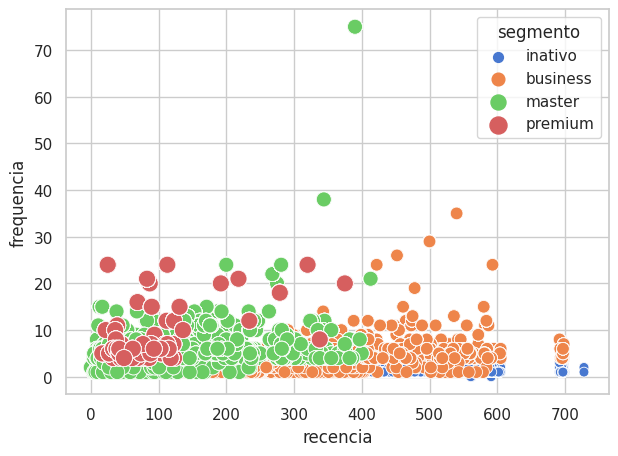

In [125]:
plot_segmento('recencia', 'frequencia', df_final)

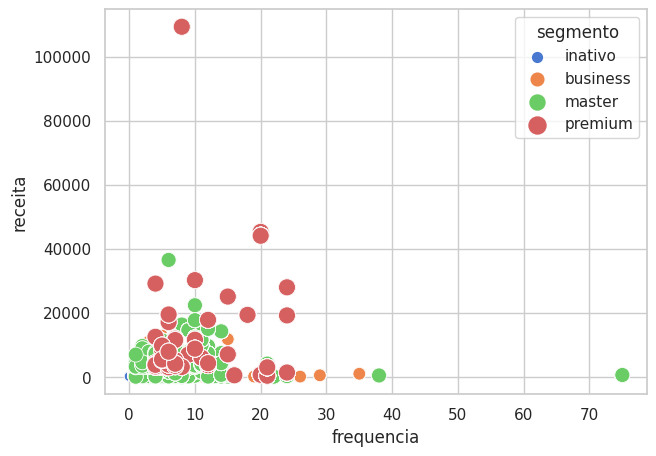

In [127]:
plot_segmento('frequencia', 'receita', df_final)

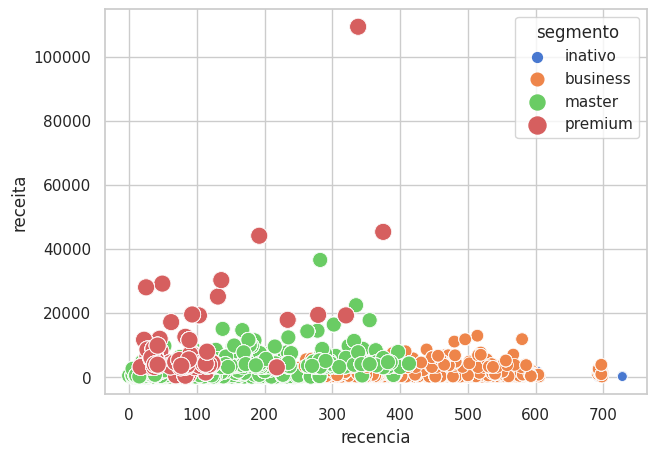

In [128]:
plot_segmento('recencia', 'receita', df_final)

<Axes: xlabel='segmento', ylabel='count'>

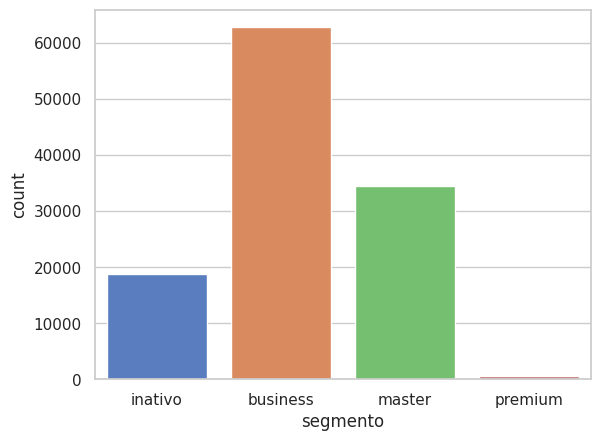

In [153]:
sns.countplot(x='segmento', data=df_final)

In [154]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_recencia)
    score = silhouette_score(df_recencia, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.5973108446723613
Silhueta para 3 clusters : 0.5746753206312172
Silhueta para 4 clusters : 0.5565064500676914
Silhueta para 5 clusters : 0.555388986552449
Silhueta para 6 clusters : 0.557129191535587
Silhueta para 7 clusters : 0.5625889188844744
Silhueta para 8 clusters : 0.5536072834016744
Silhueta para 9 clusters : 0.5601412032014897
Silhueta para 10 clusters : 0.5716532700493139


Neste curso, aprendemos então um dos métodos mais utilizados de cliusterização, o K-means, e também como podemos determinar matematicamente o melhor número de clientes. Por fim, conseguimos dividir os clientes com base em seu comportamento. Podemos também criar outros tipos de segmentação com base nas campanhas de marketing que queremos explorar. É importante ressaltar que esse é apenas um dos vários métodos de clusterização e que existem outros tipos de algoritmos e de separações que podemos fazer. Neste caso, fizemos uma clusterização com base na pontuação, ou seja, clientes que compram muito, mas com pouca frequência podem acabar tendo uma pontuação semelhante aos que gastam menos, mas com mais frequência. Para fazer uma análise mais completa, poderíamos criar uma tabela inteira se nos basearmos em uma pontuação de 1 a 5 como o exemplo abaixo:

| **Segmentos**        | **Descrição**                                                      | **Recência** | **Frequência** | **Receita** |
|----------------------|--------------------------------------------------------------------|--------------|----------------|-------------|
| Campeões             | Compraram recentemente, compram com frequência e gastam muito      | 4-5          | 4-5            | 4-5         |
| Clientes fiéis       | Gastam muito e respondem a promoções                               | 2-5          | 3-5            | 3-5         |
| Potencialmente fiéis | Compraram recentemente, mais de uma vez e gastaram uma boa quantia | 3-5          | 1-3            | 1-3         |
| Novos clientes       | Compraram recentemente, mas não compram com frequência             | 4-5          | <=1            | <=1         |
| Promissores          | Compraram recentemente, mas não gastaram muito                     | 3-4          | <=1            | <=1         |
| Precisam de atenção  | Recência, frequência e valor monetário acima da média              | 2-3          | 2-3            | 2-3         |
| Quase em risco       | Recência, frequência e valor monetário abaixo da média             | 2-3          | <=2            | <=2         |
| De risco             | Gastaram muito, compraram muitas vezes, mas há muito tempo         | <=2          | 2-5            | 2-5         |
| Não pode perdê-los   | Compraram muito e com frequência, mas há muito tempo               | <=1          | 4-5            | 4-5         |
| Hibernando           | Compraram pouco, com baixa frequência e há muito tempo             | 1-2          | 1-2            | 1-2         |
| Perdidos             | Recência, frequência e valores monetários baixos                   | <=2          | <=2            | <=2         |

In [159]:
df_final.loc[(df_final['recencia_clusters']==0) & (df_final['frequencia_clusters']==3) & (df_final['receita_clusters']==3), 'segmento'] = 'Campeao'
df_final.loc[(df_final['recencia_clusters']==1) & (df_final['frequencia_clusters']==3) & (df_final['receita_clusters']==3), 'segmento'] = 'Fiel'
df_final.loc[(df_final['recencia_clusters']==1) & (df_final['frequencia_clusters']==2) & (df_final['receita_clusters']==2), 'segmento'] = 'Potencialmente Fiel - Tipo 1'
df_final.loc[(df_final['recencia_clusters']==1) & (df_final['frequencia_clusters']==1) & (df_final['receita_clusters']==3), 'segmento'] = 'Potencialmente Fiel - Tipo 2'
df_final.loc[(df_final['recencia_clusters']==0) & (df_final['frequencia_clusters']==0) & (df_final['receita_clusters']==0), 'segmento'] = 'Novos'
df_final.loc[(df_final['recencia_clusters']==0) & (df_final['frequencia_clusters']==1) & (df_final['receita_clusters']==1), 'segmento'] = 'Promissores'
df_final.loc[(df_final['recencia_clusters']==2) & (df_final['frequencia_clusters']==2) & (df_final['receita_clusters']==2), 'segmento'] = 'Precisam Atencao'
df_final.loc[(df_final['recencia_clusters']==2) & (df_final['frequencia_clusters']==1) & (df_final['receita_clusters']==1), 'segmento'] = 'Quase em Risco'
df_final.loc[(df_final['recencia_clusters']==3) & (df_final['frequencia_clusters']==2) & (df_final['receita_clusters']==2), 'segmento'] = 'Risco'
df_final.loc[(df_final['recencia_clusters']==3) & (df_final['frequencia_clusters']==3) & (df_final['receita_clusters']==3), 'segmento'] = 'Nao pode perder - Tipo 1'
df_final.loc[(df_final['recencia_clusters']==3) & (df_final['frequencia_clusters']==1) & (df_final['receita_clusters']==1), 'segmento'] = 'Hibernando'
df_final.loc[(df_final['recencia_clusters']==3) & (df_final['frequencia_clusters']==0) & (df_final['receita_clusters']==0), 'segmento'] = 'Perdidos'

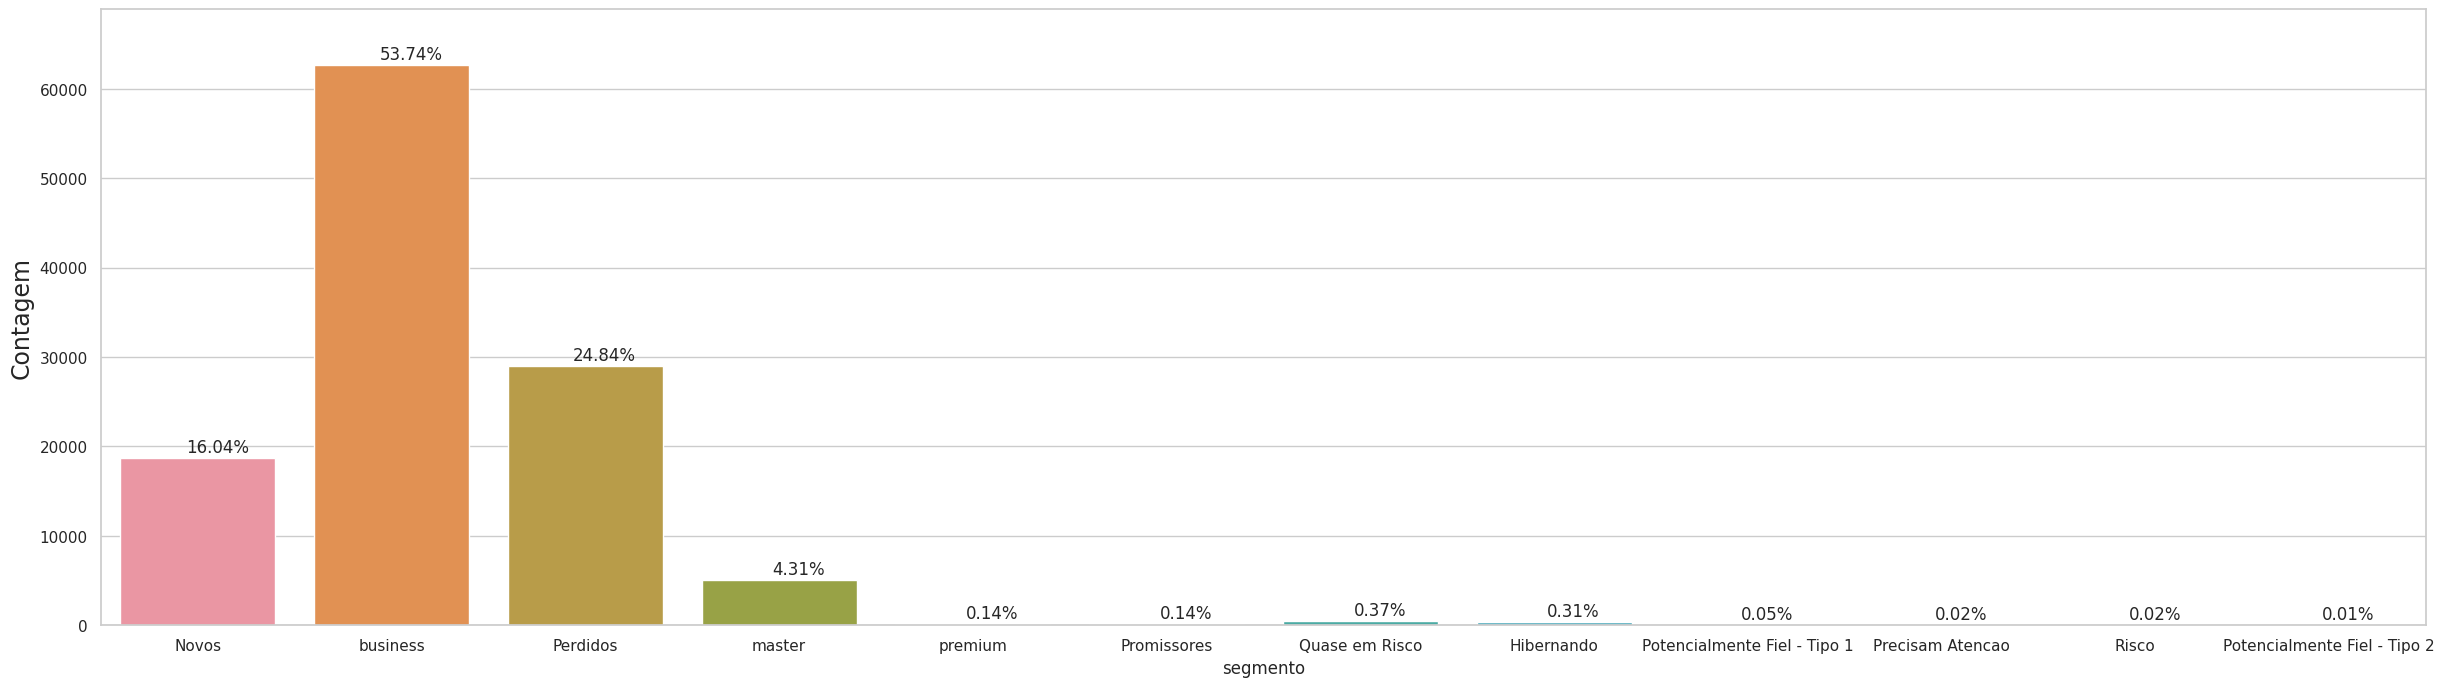

In [160]:
plot_perc('segmento', df_final, figsize=(30, 8))